In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#read dataset 'df_avocado'
df_avocado = pd.read_csv('df_avocado.csv')

In [38]:
df_avocado.head()

,Unnamed: 0,Unnamed: 0.1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [39]:
# drop 2 unnamed columns
df = df_avocado.drop(df.iloc[:,0:2], axis = 1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


Let's the average price fluctuation from 2015 to 2018.

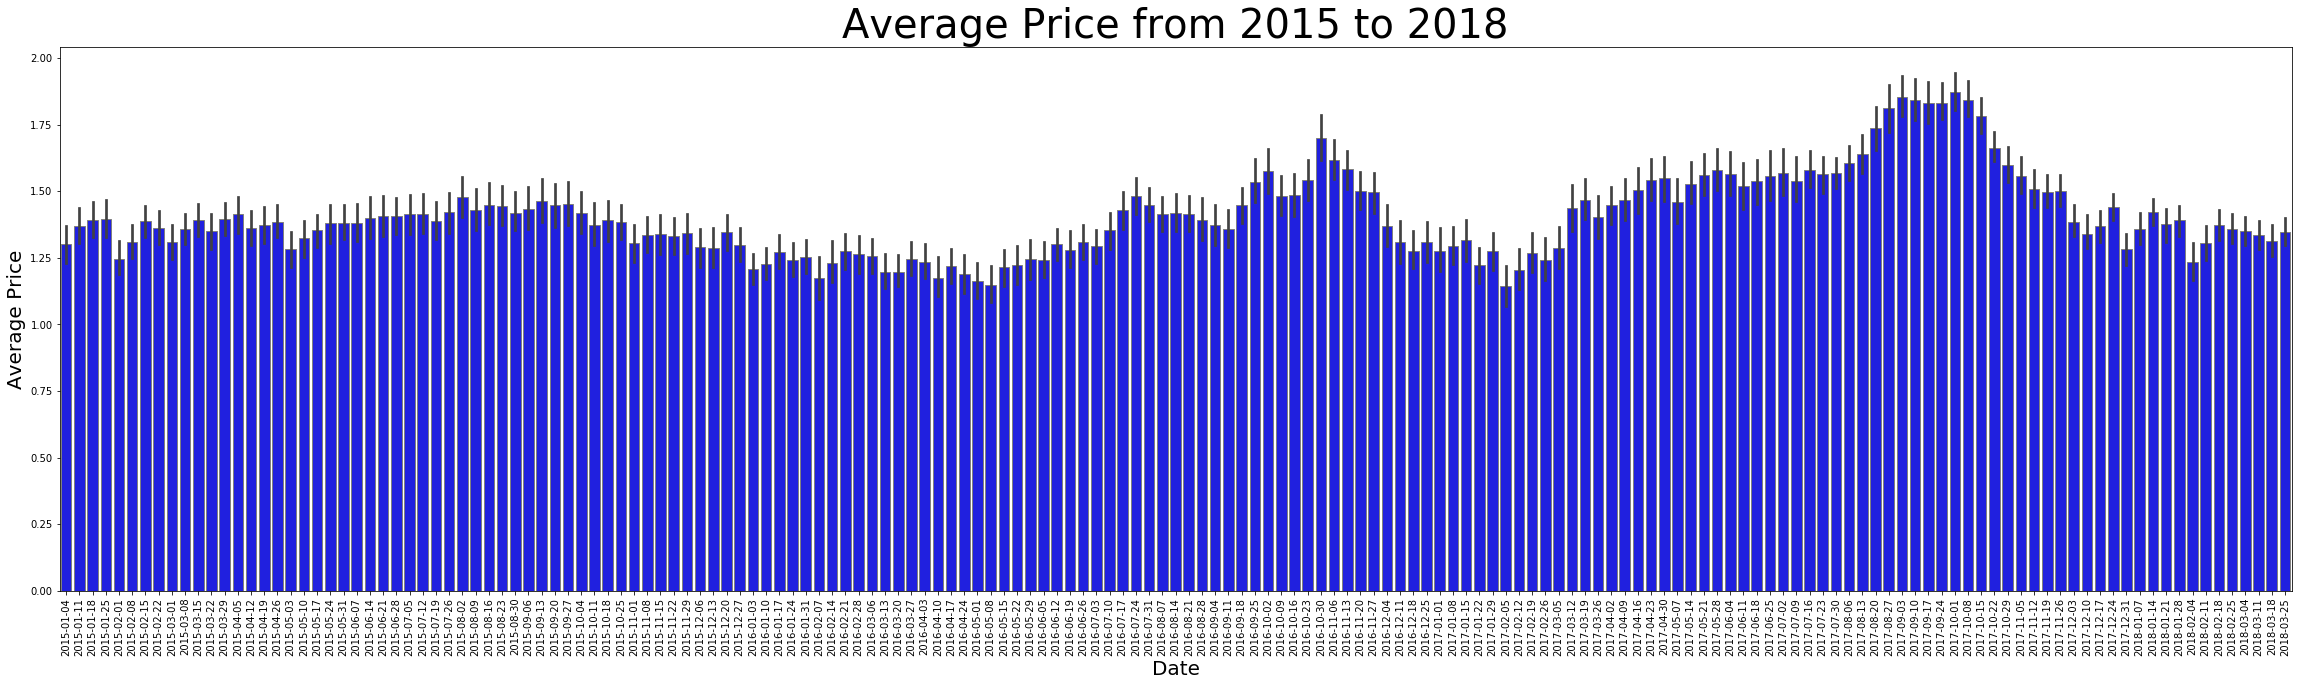

In [188]:
#Draw a plot of average_price fluctuation with the date
f, ax = plt.subplots(figsize=(40,10))
sns.barplot(df['Date'], df['AveragePrice'], data = df, color = 'blue', ec='grey')
plt.title('Average Price from 2015 to 2018', fontsize = 40)
plt.xticks(rotation = 90)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Price', fontsize = 20)
plt.show()

The highest average price is about \\$1.86 on 2017-9-24. The lowest average price is about \\$1.1 on 2016-1-31, 2016-5-1 and 2017-1-29. 
Throughout 2015, prices were relatively stable, with prices rising and surplus from 2016 to 2018. In September 2017, they reached the initial period of four years.

Next, check if total volume fluctuation infect the price fluctuation.

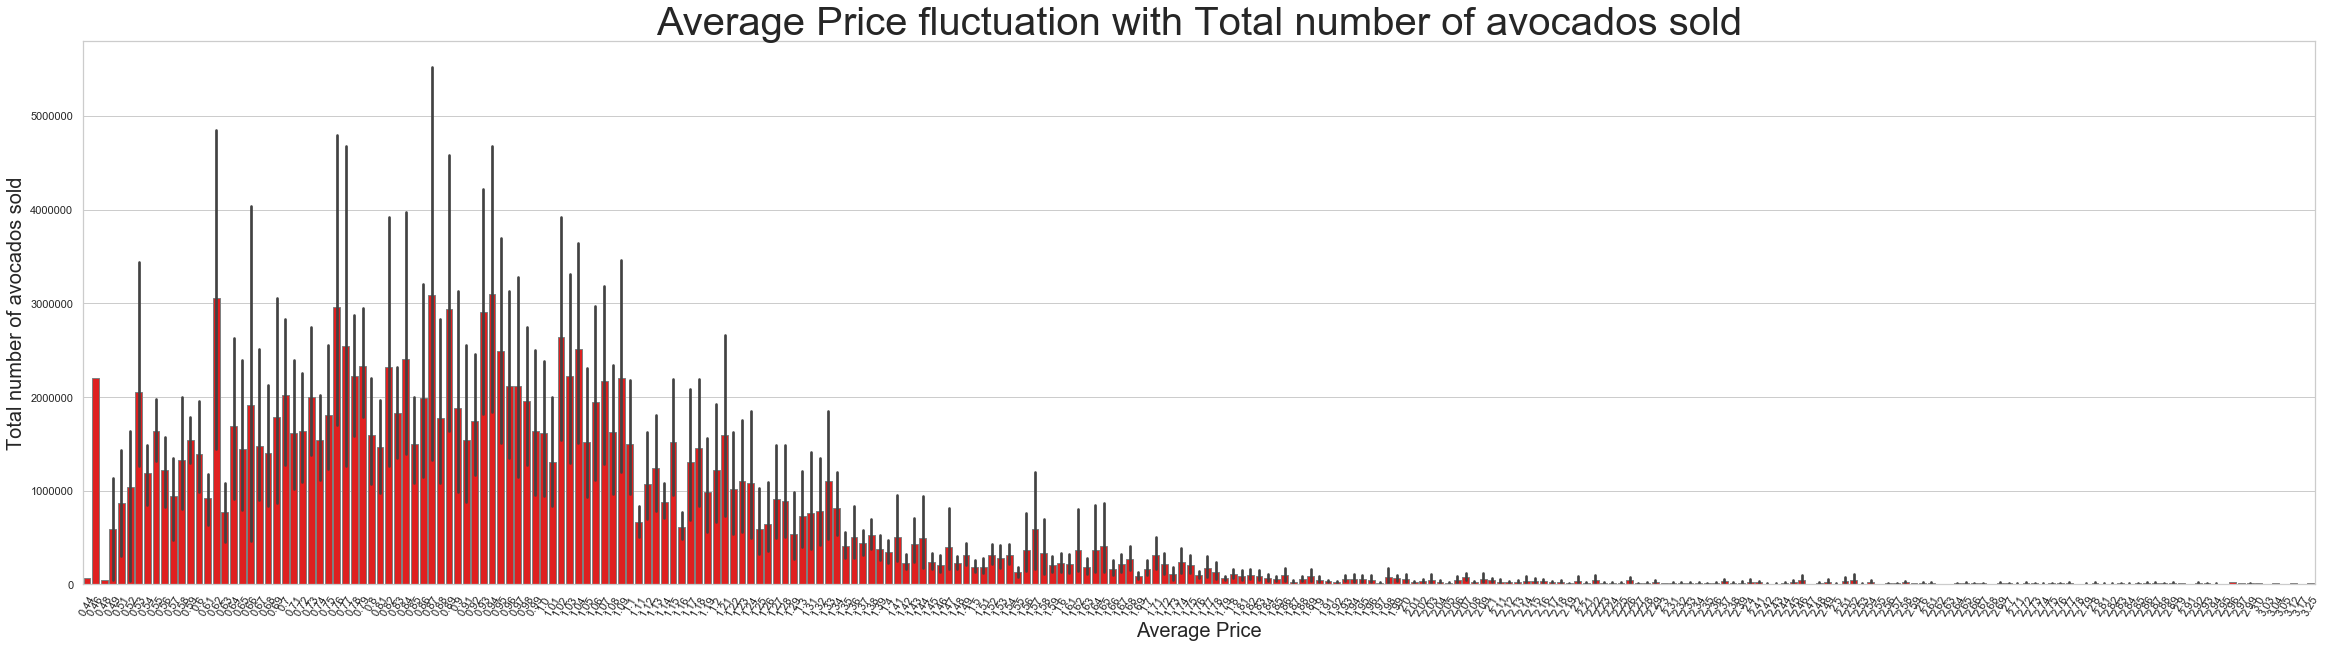

In [281]:
#Draw hist plot to show the relationship
f, ax = plt.subplots(figsize = (40,10))
sns.barplot(df['AveragePrice'],df['Total Volume'],data = df, color = 'red', ec = 'gray')
plt.title('Average Price fluctuation with Total number of avocados sold', fontsize = 40)
plt.xticks(rotation = 60)
plt.xlabel('Average Price', fontsize = 20)
plt.ylabel('Total number of avocados sold', fontsize = 20)
plt.show()

The highest number of avocados sold is 54956 with average prices \\$0.62 and \\$0.86. Highest price is \\$3.25, but the prices with lowest sold number is happend in a range from \\$2.47 to \\$3.17.
Lowest price \\$0.44 do not bring a huge selling volume, \\$0.46 did, but later get jump down on \\$0.48.

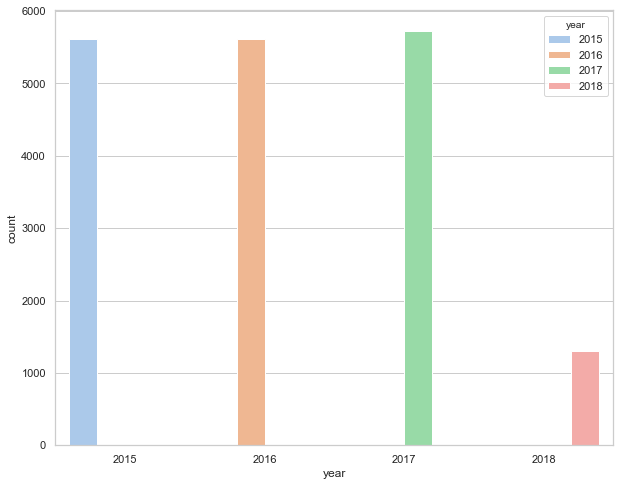

In [285]:
#Count of years
ax, f = plt.subplots(figsize = (10, 8))
sns.countplot(x='year',hue = 'year',data=df);

The counts of 2015 to 2016 are similar, 2016 reached the highest point. 2018 only collected 3 months data, so it's short.

In [227]:
# What's the most sold avocados varieties 
total4046 = df.groupby(by = ['year','type'])['4046'].apply(lambda x: x.sum()).reset_index(name = 'sum')
total4225 = df.groupby(by = ['year','type'])['4225'].apply(lambda x: x.sum()).reset_index(name = 'sum')
total4770 = df.groupby(by = ['year','type'])['4770'].apply(lambda x: x.sum()).reset_index(name = 'sum')
print(total4046.head(), '\n')
print(total4225.head(), '\n')
print(total4770.head() )

   year          type           sum
0  2015  conventional  1.684012e+09
1  2015       organic  2.543770e+07
2  2016  conventional  1.506717e+09
3  2016       organic  1.840599e+07
4  2017  conventional  1.633633e+09 

   year          type           sum
0  2015  conventional  1.722568e+09
1  2015       organic  3.848569e+07
2  2016  conventional  1.626665e+09
3  2016       organic  4.606313e+07
4  2017  conventional  1.500535e+09 

   year          type           sum
0  2015  conventional  1.419177e+08
1  2015       organic  8.546843e+05
2  2016  conventional  1.587665e+08
3  2016       organic  1.113310e+06
4  2017  conventional  9.080494e+07


I got the sum of the 3 avocados varieties sold in 3 years with 2 kinds of types.
Now draw plots to compare them.

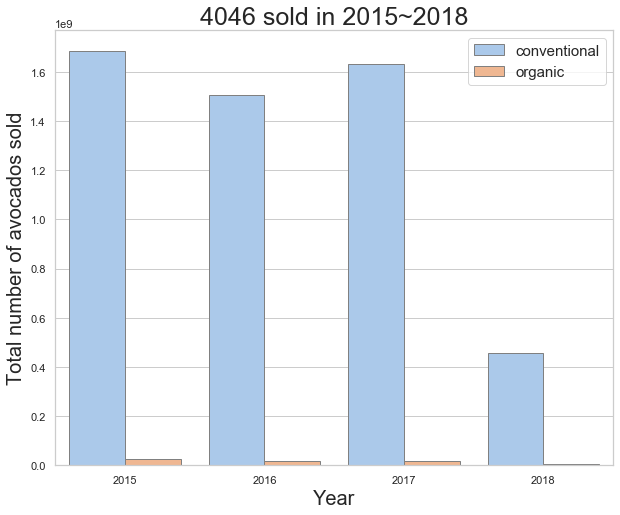

In [276]:
#Draw plot of sold avocados varieties
#4046
ax, f = plt.subplots(figsize = (10,8))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.barplot(x = total4046['year'], y = total4046['sum'], hue = 'type', ec = 'gray', data = total4046)
plt.title('4046 sold in 2015~2018', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total number of avocados sold', fontsize = 20)
plt.legend(prop = {'size': 15})
plt.show()

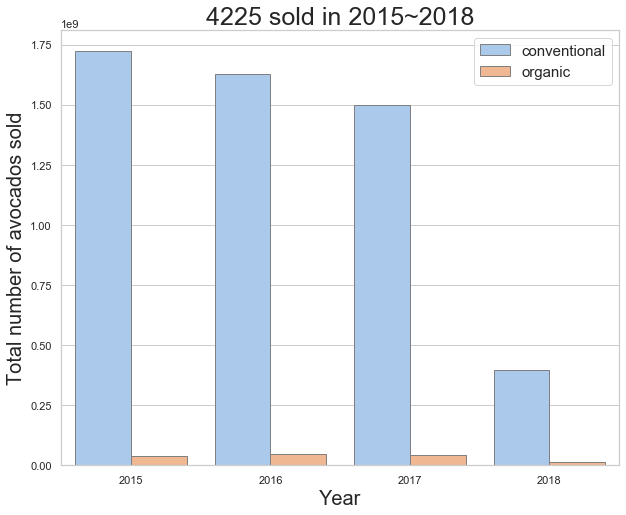

In [277]:
#4225
ax, f = plt.subplots(figsize = (10,8))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.barplot(x = total4225['year'], y = total4225['sum'], hue = 'type', ec = 'gray', data = total4225)
plt.title('4225 sold in 2015~2018', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total number of avocados sold', fontsize = 20)
plt.legend(prop = {'size': 15})
plt.show()

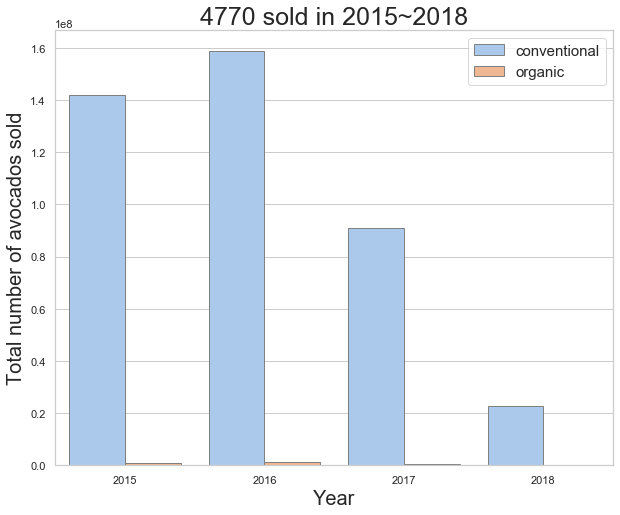

In [278]:
#4770
ax, f = plt.subplots(figsize = (10,8))

sns.barplot(x = total4770['year'], y = total4770['sum'], hue = 'type', ec = 'gray',data = total4770)
plt.title('4770 sold in 2015~2018', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total number of avocados sold', fontsize = 20)
plt.legend(prop = {'size': 15})
plt.show()

No matter what kind of avocado, the number of sold of conventional much higher than organic sold.
Is that the price caused by the difference of the selling number between conventional and organic?

Let's take a look of price difference of conventional and organic.

In [292]:
#Check the prices of two types of avocades
priceCon = df[df['type'] == 'conventional']['AveragePrice'].reset_index(name = 'price')
priceOrg = df[df['type'] == 'organic']['AveragePrice'].reset_index(name = 'price')
print(priceCon, '\n', priceOrg)

      index  price
0         3   1.52
1         5   0.75
2         6   0.85
3         8   1.00
4         9   0.80
...     ...    ...
9121  18239   1.39
9122  18242   1.32
9123  18244   1.36
9124  18245   0.70
9125  18248   1.34

[9126 rows x 2 columns] 
       index  price
0         0   1.75
1         1   1.49
2         2   1.68
3         4   1.64
4         7   1.50
...     ...    ...
9118  18240   1.75
9119  18241   1.42
9120  18243   1.74
9121  18246   1.42
9122  18247   1.70

[9123 rows x 2 columns]


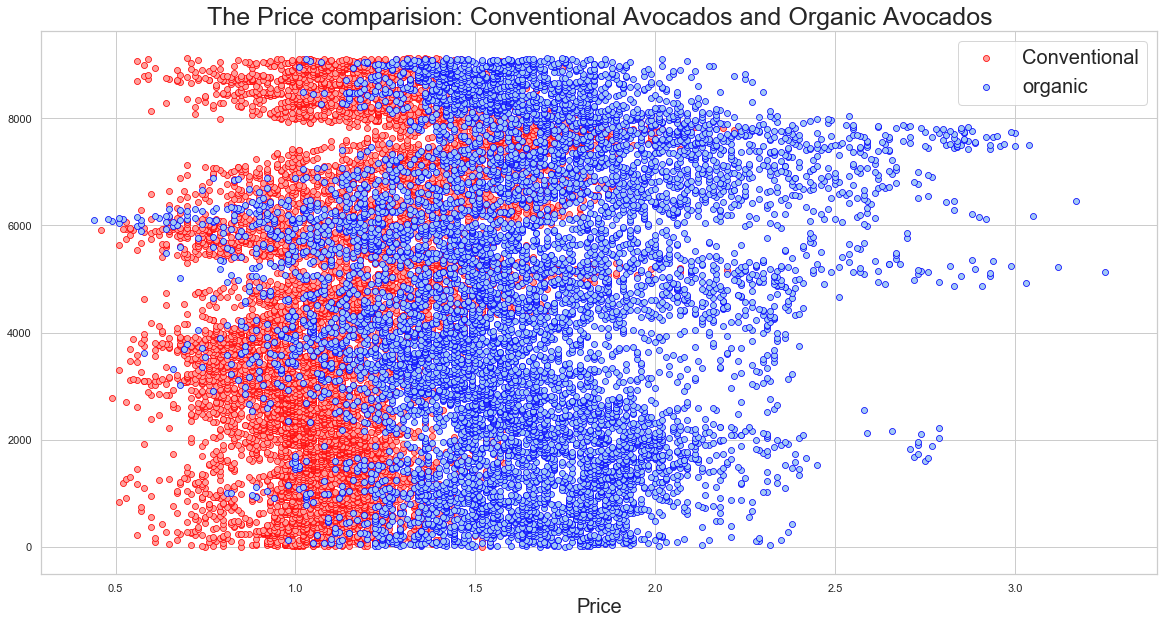

In [265]:
#Draw a plot to compare the price difference
ax,f = plt.subplots(figsize =(20,10))

sns.scatterplot(x = priceCon.price, y = priceCon.index, data = priceCon, color = 'r', ec ='red',label = 'Conventional')
sns.scatterplot(x = priceOrg.price, y = priceOrg.index, data = priceOrg, color = 'b', ec='blue',label = 'organic')

plt.title('The Price comparision: Conventional Avocados and Organic Avocados', fontsize = 25)
plt.xlabel('Price', fontsize = 20)
plt.legend(prop={'size':20})
plt.show()

Obviously the price of organic avocado is much higher than conventional avocado.
Organic avocado’s price range is \\$1.0 to \\$3.0, a few stay lower than \\$1.0 and higher than $3.0, it may be affected by the market situation.
Conventional avocado’s price range is \\$0.5 to \\$2.5.

Therefore, I can determine that the price factor is one of the certain factors that leads to product sales.